In [1]:
import math
import warnings
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")

In [3]:
df.shape

(1470, 35)

In [4]:
pd.set_option('display.max_columns',None)

In [5]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


**Check for data types using info()**

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

**Check for null values**

In [7]:
null_sum=df.isnull().sum()
null_ratio=df.isnull().sum()/df.shape[0]
pd.DataFrame([null_sum,null_ratio],index=["Null_sum","Null_ratio"])

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Null_sum,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Null_ratio,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


**Check for unique values**

In [8]:
pd.DataFrame([df.nunique(),df.dtypes],index=["num_unique","dtypes"])

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
num_unique,43,2,3,886,3,29,5,6,1,1470,4,2,71,4,5,9,4,3,1349,1427,10,1,2,15,2,4,1,4,40,7,4,37,19,16,18
dtypes,int64,object,object,int64,object,int64,int64,object,int64,int64,int64,object,int64,int64,int64,object,int64,object,int64,int64,int64,object,object,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64


# Drop columns

In [9]:
df.drop(['EmployeeCount','EmployeeNumber','Over18','StandardHours'],axis=1,inplace=True)

**Change location of Attrition to the last column**

In [10]:
columns=df.columns.tolist()
columns.append(columns.pop(columns.index("Attrition")))
df=df[columns]

# Reprsent some columns as categorical

In [11]:
cols="Attrition BusinessTravel Department Education EducationField EnvironmentSatisfaction Gender JobInvolvement JobLevel JobRole JobSatisfaction MaritalStatus NumCompaniesWorked OverTime PerformanceRating RelationshipSatisfaction StockOptionLevel TrainingTimesLastYear WorkLifeBalance".split()
df[cols]=df[cols].astype("category")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Age                       1470 non-null   int64   
 1   BusinessTravel            1470 non-null   category
 2   DailyRate                 1470 non-null   int64   
 3   Department                1470 non-null   category
 4   DistanceFromHome          1470 non-null   int64   
 5   Education                 1470 non-null   category
 6   EducationField            1470 non-null   category
 7   EnvironmentSatisfaction   1470 non-null   category
 8   Gender                    1470 non-null   category
 9   HourlyRate                1470 non-null   int64   
 10  JobInvolvement            1470 non-null   category
 11  JobLevel                  1470 non-null   category
 12  JobRole                   1470 non-null   category
 13  JobSatisfaction           1470 non-null   catego

# Check for duplicated

In [12]:
df.duplicated().sum()

0

**Statistics about data**

In [13]:
df.describe()

,Age,DailyRate,DistanceFromHome,HourlyRate,MonthlyIncome,MonthlyRate,PercentSalaryHike,TotalWorkingYears,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,65.891156,6502.931293,14313.103401,15.209524,11.279592,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,20.329428,4707.956783,7117.786044,3.659938,7.780782,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,30.000000,1009.000000,2094.000000,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,48.000000,2911.000000,8047.000000,12.000000,6.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,66.000000,4919.000000,14235.500000,14.000000,10.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,83.750000,8379.000000,20461.500000,18.000000,15.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,100.000000,19999.000000,26999.000000,25.000000,40.000000,40.000000,18.000000,15.000000,17.000000


In [14]:
df.describe(include="category")

,BusinessTravel,Department,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,NumCompaniesWorked,OverTime,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TrainingTimesLastYear,WorkLifeBalance,Attrition
count,1470,1470,1470,1470,1470,1470,1470,1470,1470,1470,1470,1470,1470,1470,1470,1470,1470,1470,1470
unique,3,3,5,6,4,2,4,5,9,4,3,10,2,2,4,4,7,4,2
top,Travel_Rarely,Research & Development,3,Life Sciences,3,Male,3,1,Sales Executive,4,Married,1,No,3,3,0,2,3,No
freq,1043,961,572,606,453,882,868,543,326,459,673,521,1054,1244,459,631,547,893,1233


### Visualization

In [32]:
numeric_df=df.select_dtypes("number")
# numeric_df

In [34]:
categorical_df=df.select_dtypes("category")
# categorical_df

**Check for outliers**

<function matplotlib.pyplot.show(close=None, block=None)>

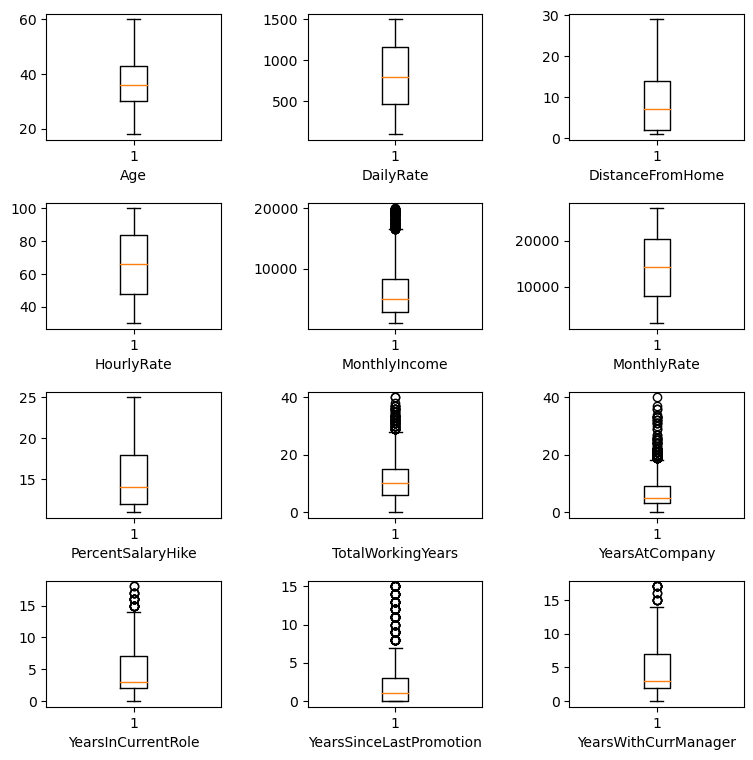

In [17]:
plt.figure(figsize=(9,9))
for i,col in enumerate(numeric_df):
    plt.subplot(4,3,i+1)
    plt.boxplot(df[col])
    plt.xlabel(col)
plt.subplots_adjust(wspace=.5,hspace=.5)
plt.show

## Check for normal distribution 

<function matplotlib.pyplot.show(close=None, block=None)>

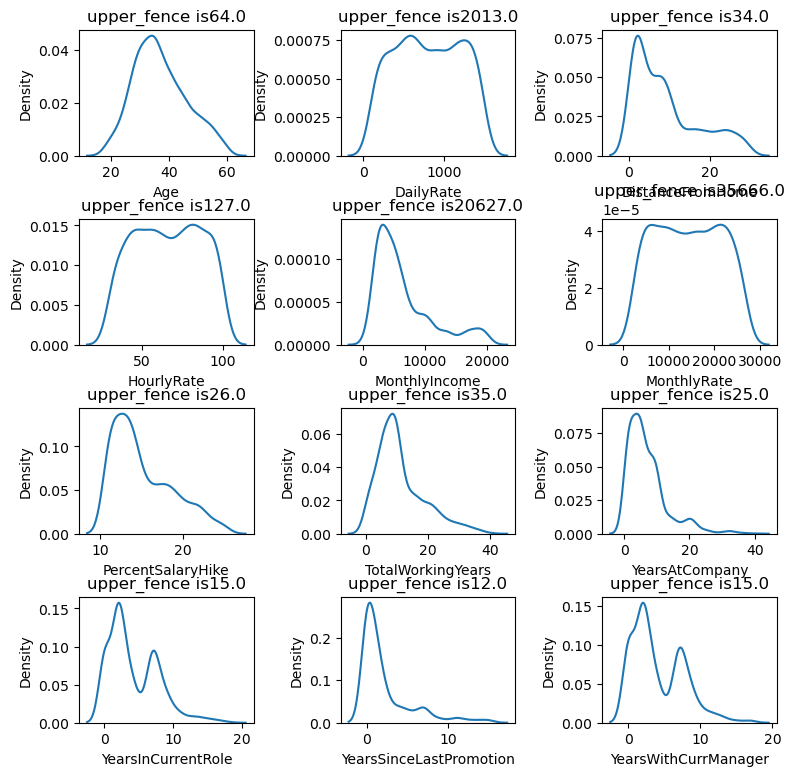

In [18]:
plt.figure(figsize=(9,9))
for i,col in enumerate(numeric_df):
    plt.subplot(4,3,i+1)
    sns.kdeplot(df[col])
    m=df[col].mean()
    s=df[col].std()
    upper_fence=m+3*s
    lower_fence=m-3*s
    plt.title(f"upper_fence is{np.round(upper_fence)}")
plt.subplots_adjust(wspace=.5,hspace=.5)
plt.show

## Replace outliers

In [19]:
for col in numeric_df:
    Q3=df[col].quantile(.75)
    Q1=df[col].quantile(.25)
    IQR=Q3-Q1
    
    upper_fence=Q3+1.5*IQR
    lower_fence=Q1*1.5*IQR
    
    upper_out=df[df[col]>upper_fence][col].values
    df[col].replace(upper_out,upper_fence,inplace=True)
    
    lower_out=df[df[col]<lower_fence][col].values
    df[col].replace(lower_out,lower_fence,inplace=True)
    
    
#     print(f"Upper fence of {col} is: {upper_fence}")
#     print(df[col].max())    
#     print(f"lower fence of {col} is: {lower_fence}")
#     print(".................")


<function matplotlib.pyplot.show(close=None, block=None)>

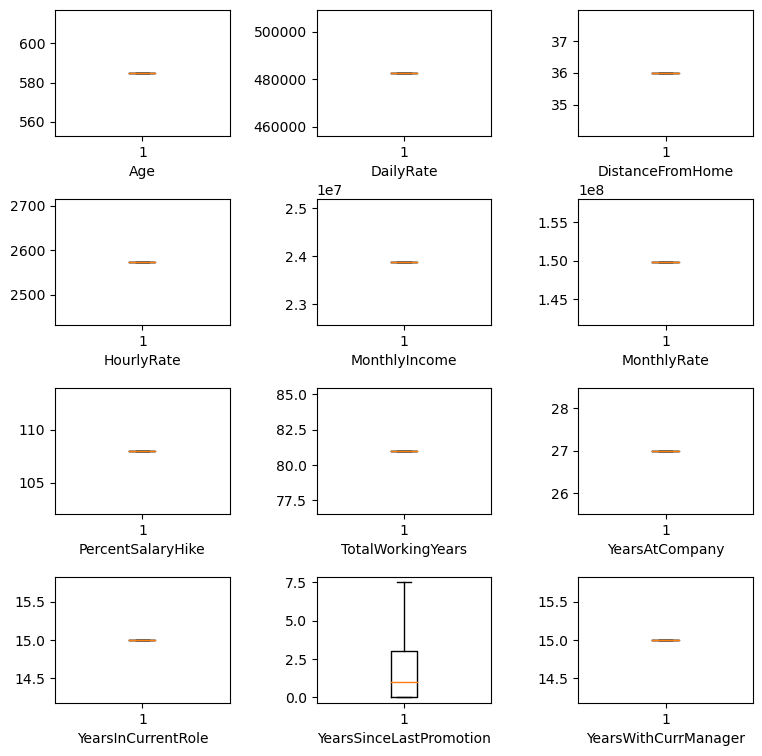

In [20]:
plt.figure(figsize=(9,9))
for i,col in enumerate(numeric_df):
    plt.subplot(4,3,i+1)
    plt.boxplot(df[col])
    plt.xlabel(col)
plt.subplots_adjust(wspace=.5,hspace=.5)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

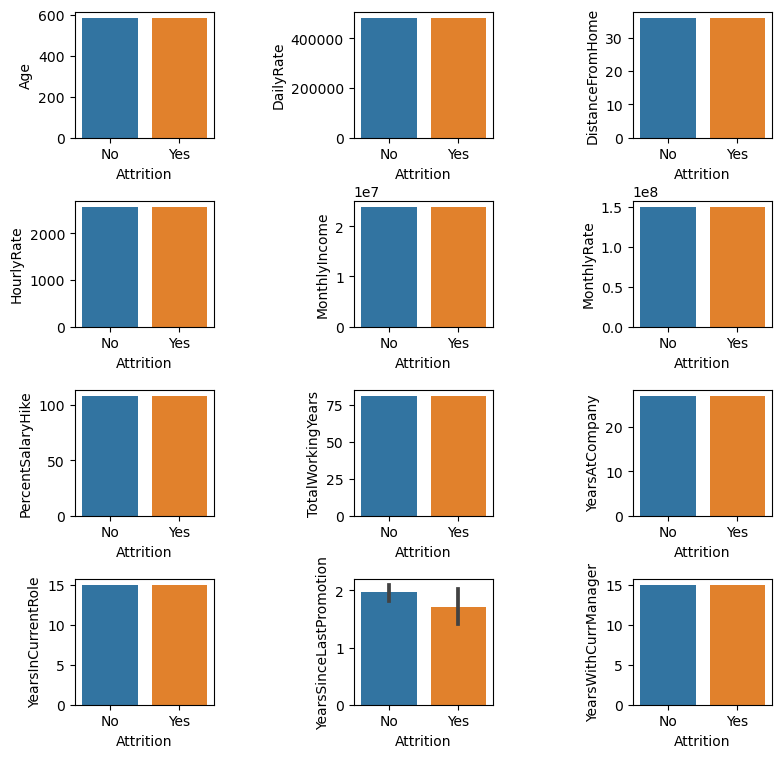

In [21]:
plt.figure(figsize=(9,9))
for i,col in enumerate(numeric_df):
    plt.subplot(4,3,i+1)
    sns.barplot(x=df["Attrition"],y=df[col])
    plt.xlabel("Attrition")
    plt.ylabel(col)
plt.subplots_adjust(wspace=1,hspace=.5)
plt.show

BusinessTravel & Attrition


BusinessTravel,Non-Travel,Travel_Frequently,Travel_Rarely
Attrition,,,
No,138,208,887
Yes,12,69,156


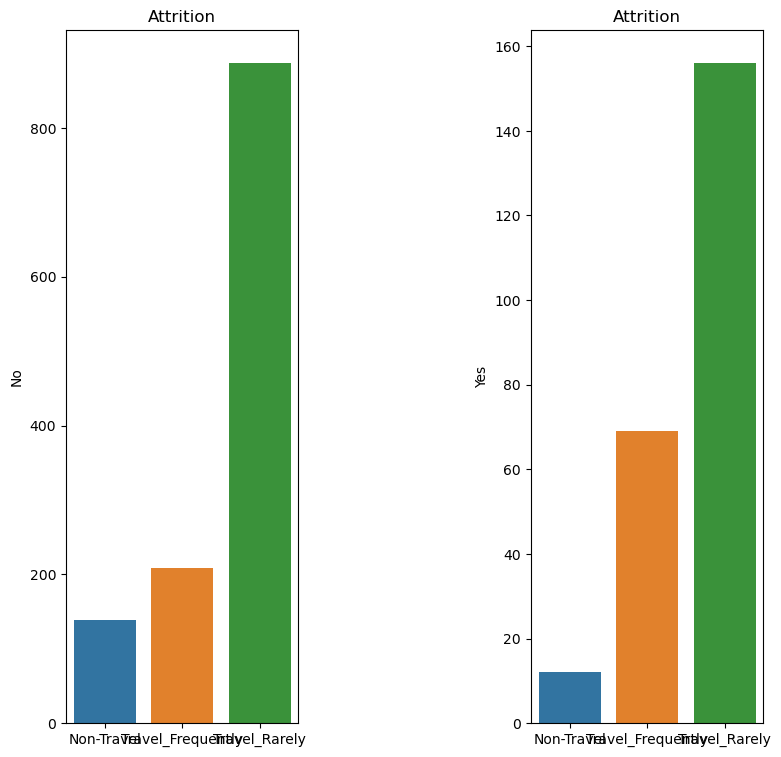

Department & Attrition


Department,Human Resources,Research & Development,Sales
Attrition,,,
No,51,828,354
Yes,12,133,92


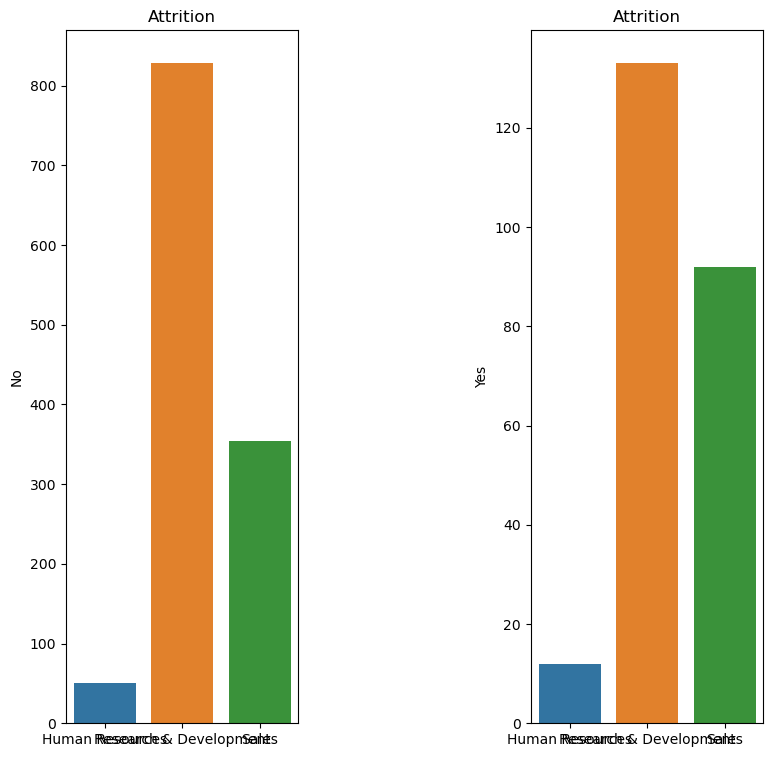

Education & Attrition


Education,1,2,3,4,5
Attrition,,,,,
No,139,238,473,340,43
Yes,31,44,99,58,5


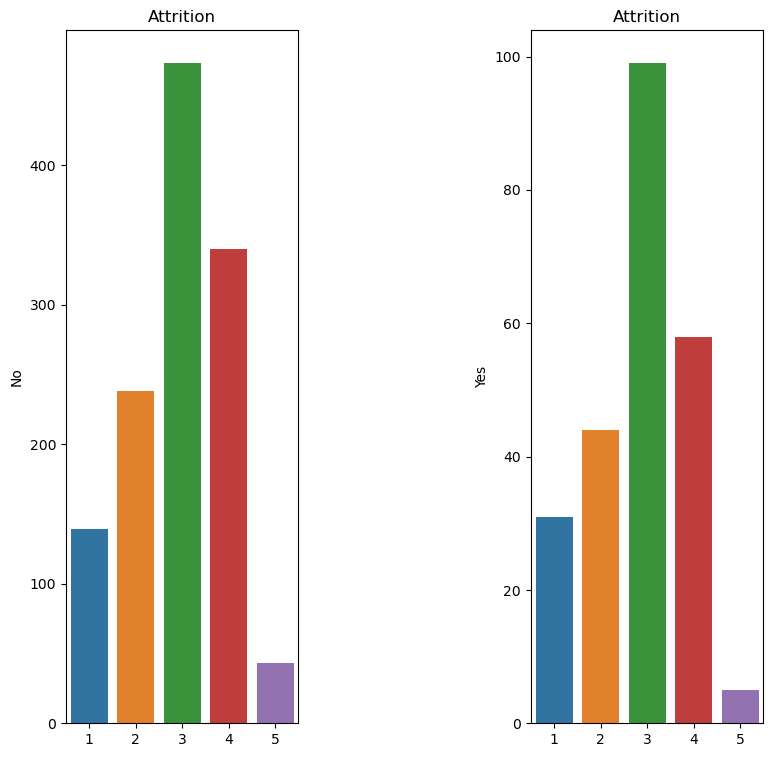

EducationField & Attrition


EducationField,Human Resources,Life Sciences,Marketing,Medical,Other,Technical Degree
Attrition,,,,,,
No,20,517,124,401,71,100
Yes,7,89,35,63,11,32


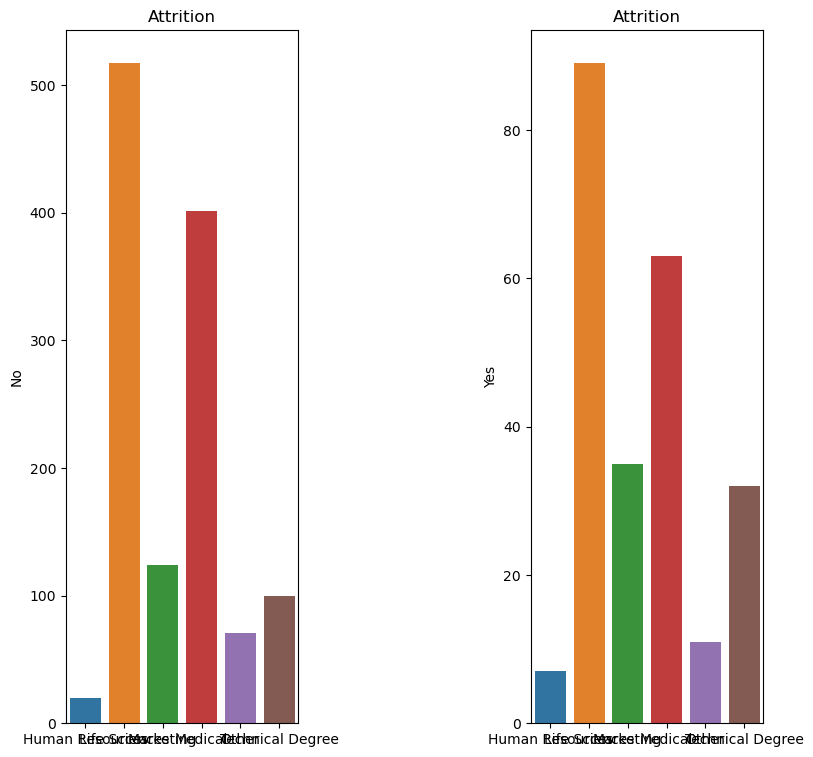

EnvironmentSatisfaction & Attrition


EnvironmentSatisfaction,1,2,3,4
Attrition,,,,
No,212,244,391,386
Yes,72,43,62,60


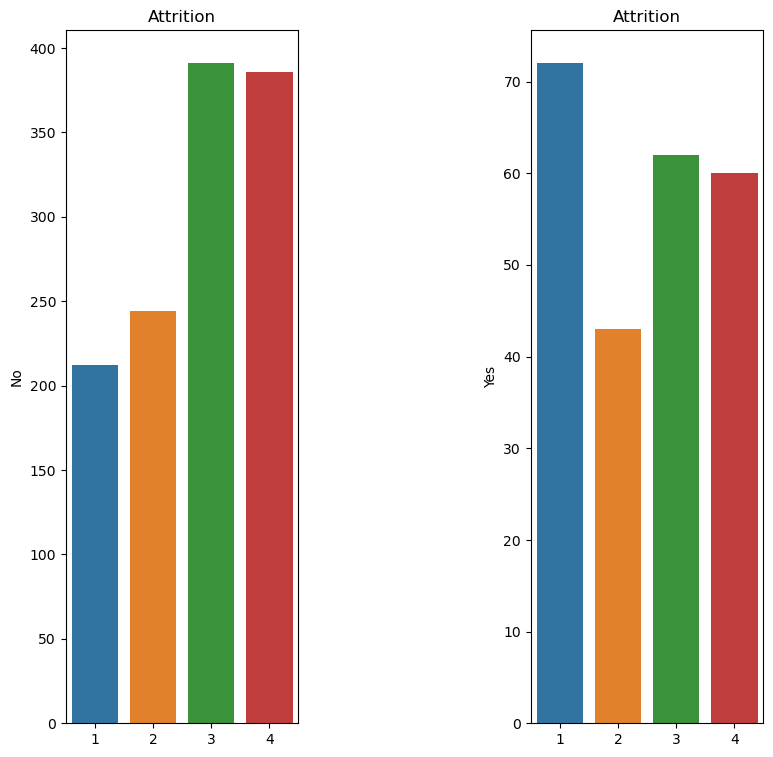

Gender & Attrition


Gender,Female,Male
Attrition,,
No,501,732
Yes,87,150


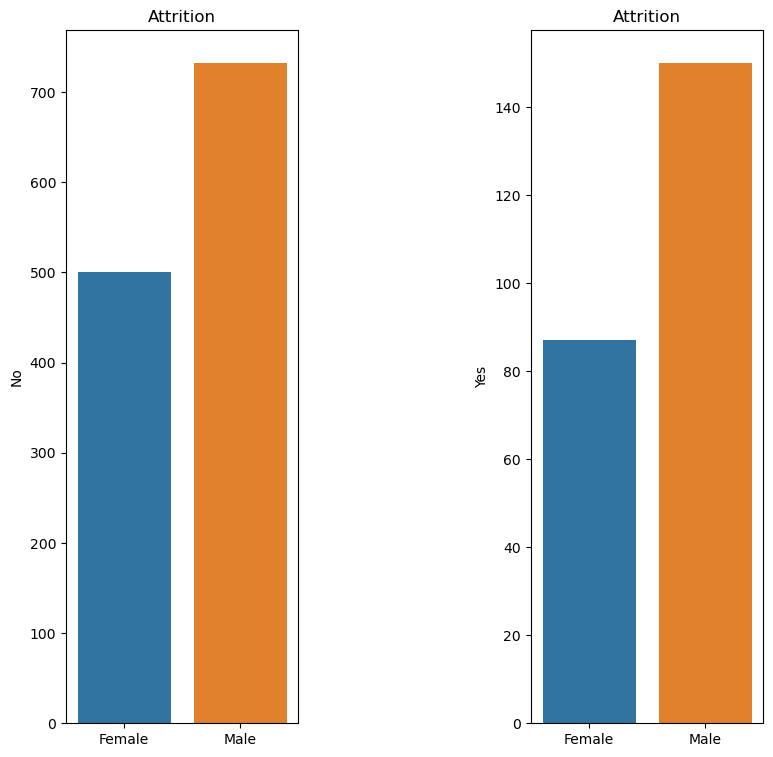

JobInvolvement & Attrition


JobInvolvement,1,2,3,4
Attrition,,,,
No,55,304,743,131
Yes,28,71,125,13


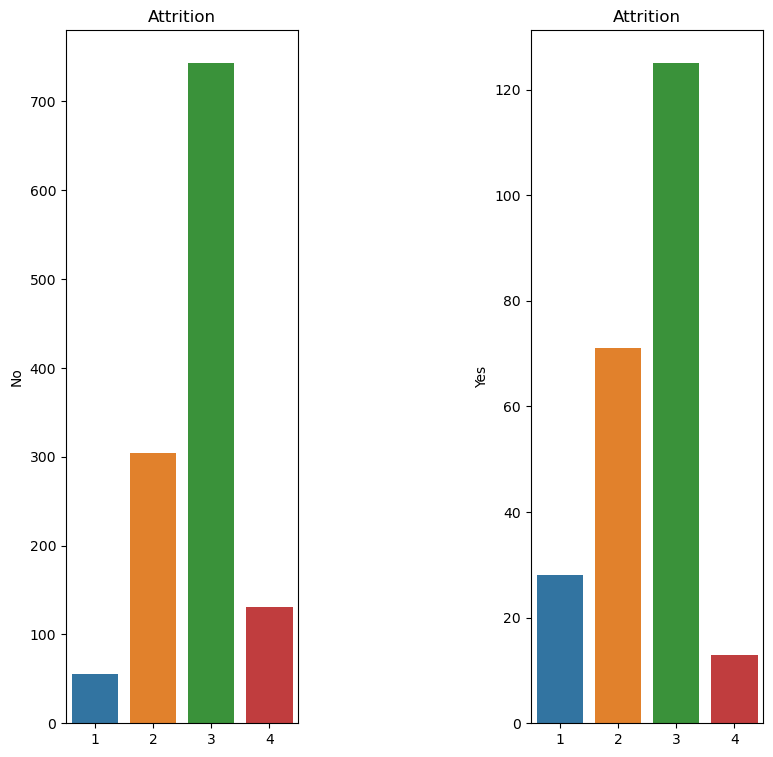

JobLevel & Attrition


JobLevel,1,2,3,4,5
Attrition,,,,,
No,400,482,186,101,64
Yes,143,52,32,5,5


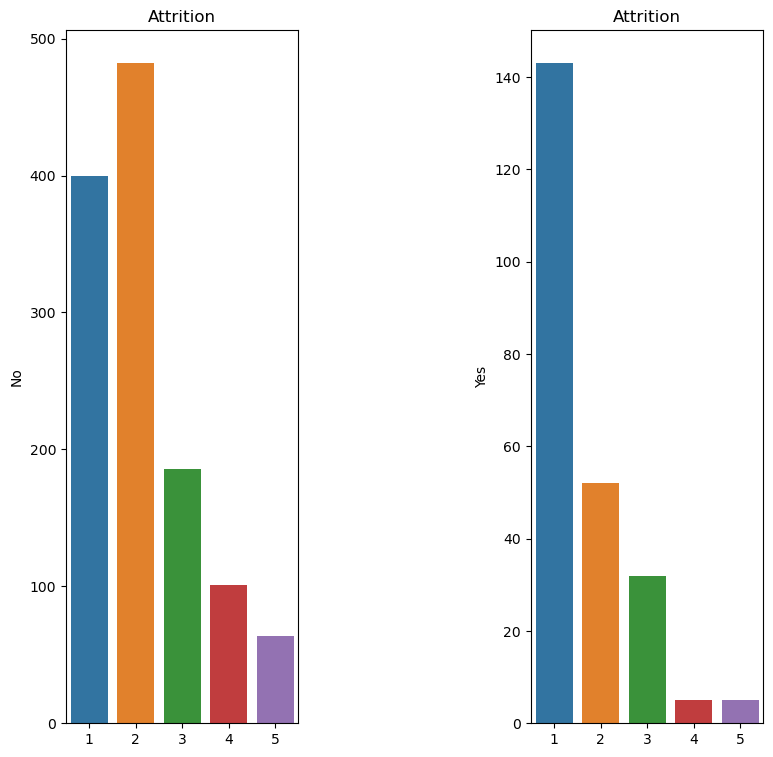

JobRole & Attrition


JobRole,Healthcare Representative,Human Resources,Laboratory Technician,Manager,Manufacturing Director,Research Director,Research Scientist,Sales Executive,Sales Representative
Attrition,,,,,,,,,
No,122,40,197,97,135,78,245,269,50
Yes,9,12,62,5,10,2,47,57,33


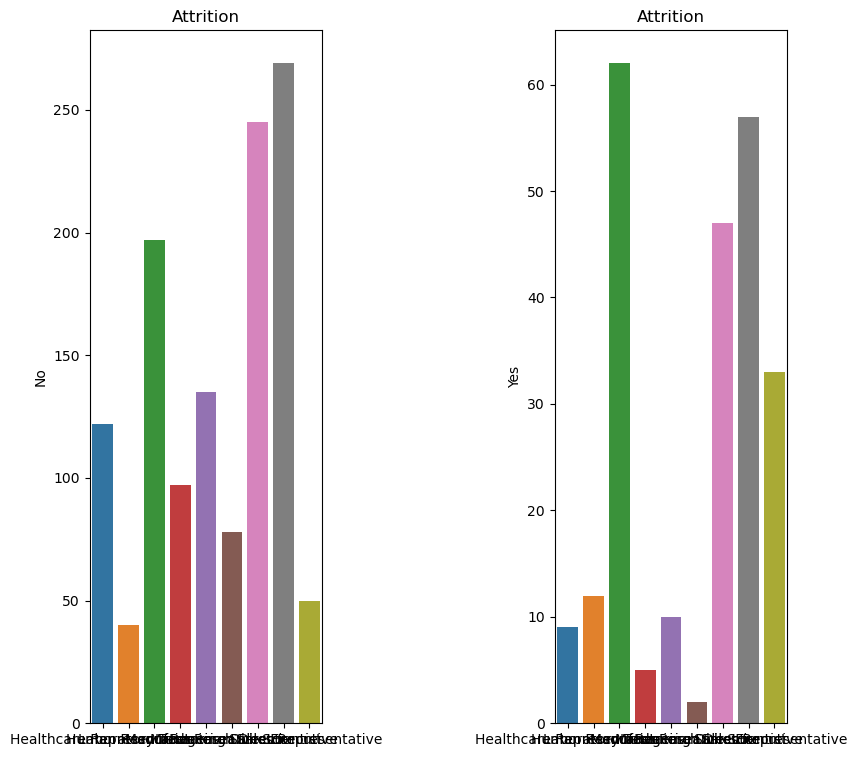

JobSatisfaction & Attrition


JobSatisfaction,1,2,3,4
Attrition,,,,
No,223,234,369,407
Yes,66,46,73,52


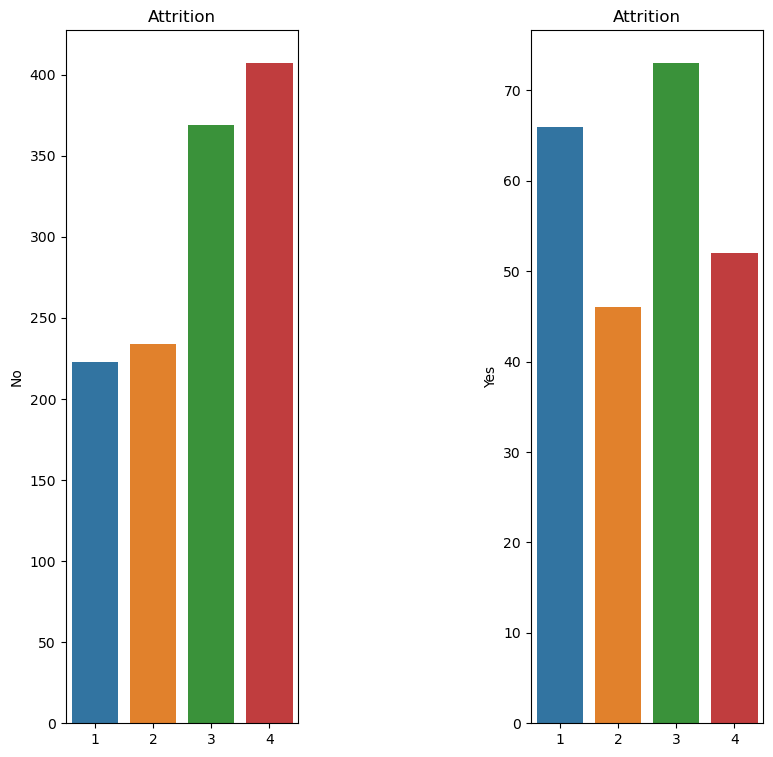

MaritalStatus & Attrition


MaritalStatus,Divorced,Married,Single
Attrition,,,
No,294,589,350
Yes,33,84,120


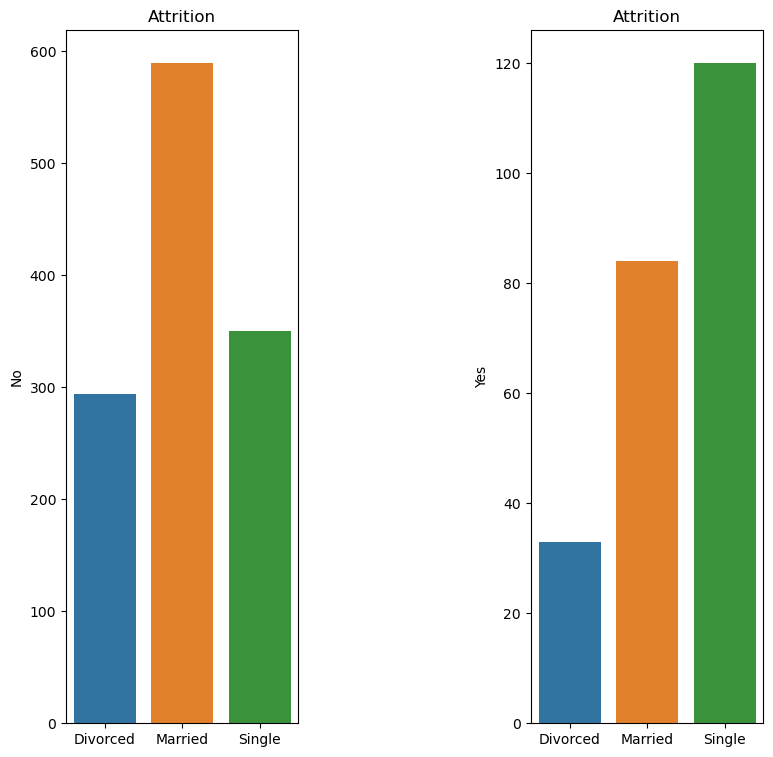

NumCompaniesWorked & Attrition


NumCompaniesWorked,0,1,2,3,4,5,6,7,8,9
Attrition,,,,,,,,,,
No,174,423,130,143,122,47,54,57,43,40
Yes,23,98,16,16,17,16,16,17,6,12


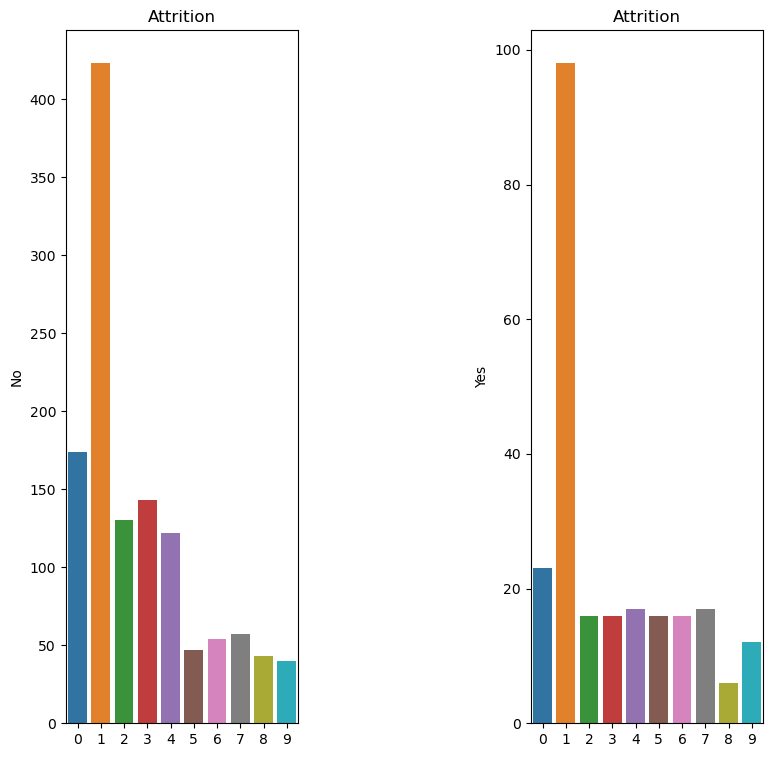

OverTime & Attrition


OverTime,No,Yes
Attrition,,
No,944,289
Yes,110,127


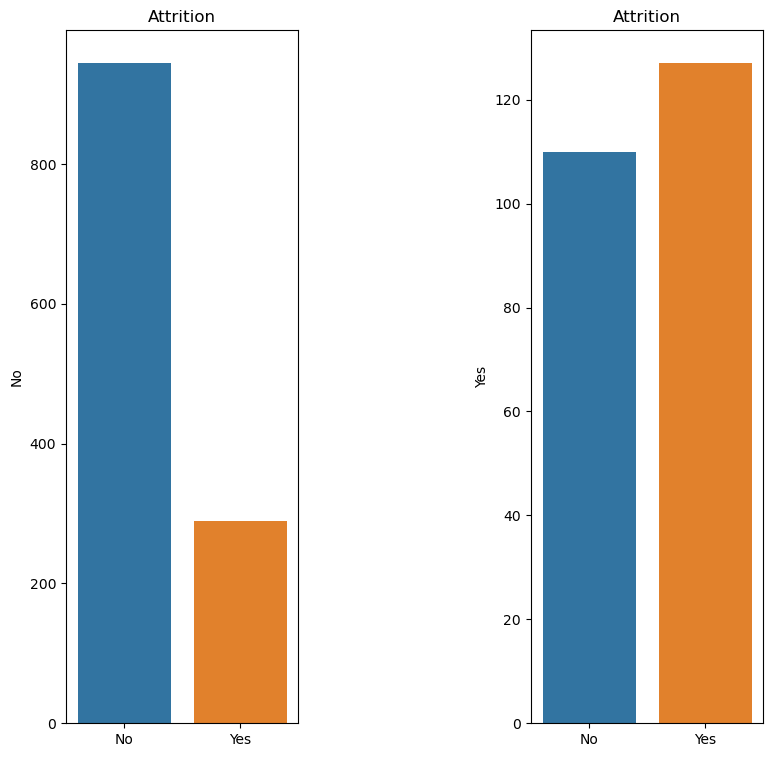

PerformanceRating & Attrition


PerformanceRating,3,4
Attrition,,
No,1044,189
Yes,200,37


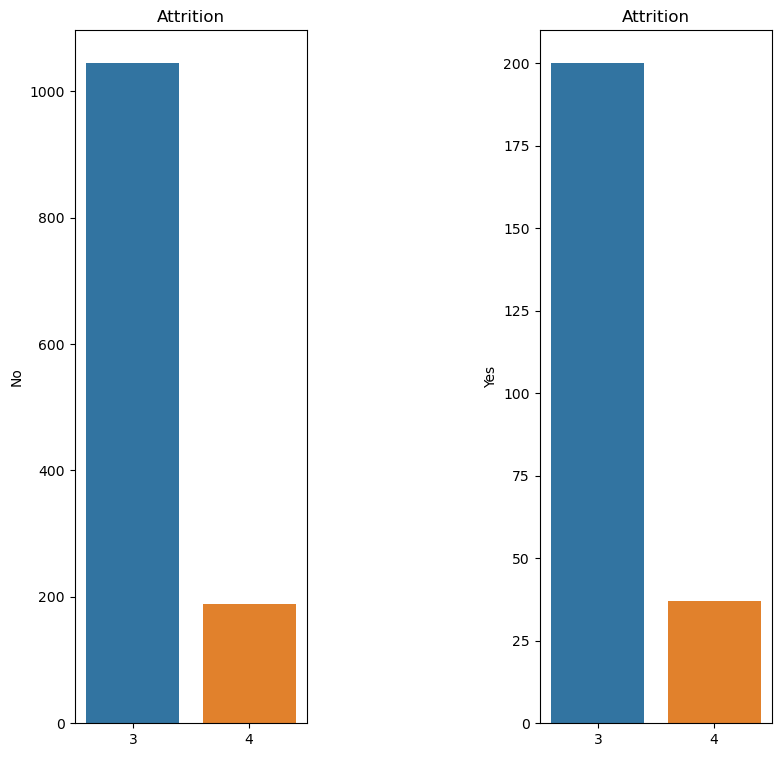

RelationshipSatisfaction & Attrition


RelationshipSatisfaction,1,2,3,4
Attrition,,,,
No,219,258,388,368
Yes,57,45,71,64


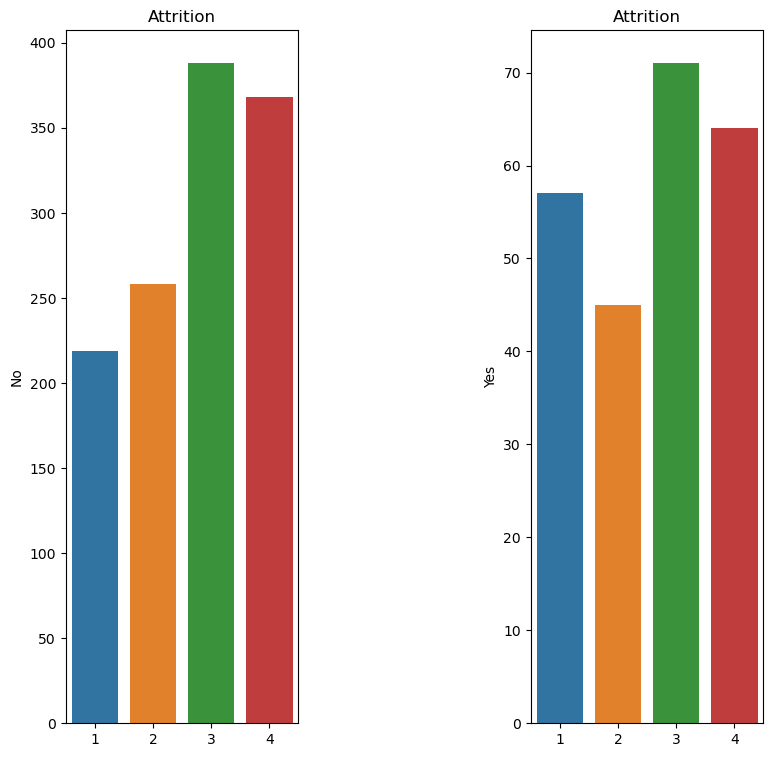

StockOptionLevel & Attrition


StockOptionLevel,0,1,2,3
Attrition,,,,
No,477,540,146,70
Yes,154,56,12,15


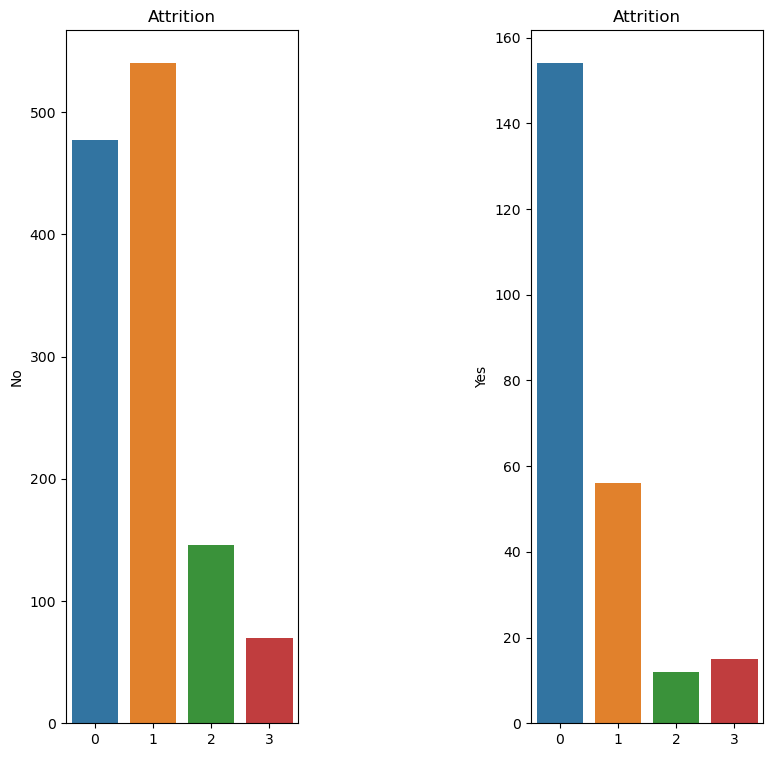

TrainingTimesLastYear & Attrition


TrainingTimesLastYear,0,1,2,3,4,5,6
Attrition,,,,,,,
No,39,62,449,422,97,105,59
Yes,15,9,98,69,26,14,6


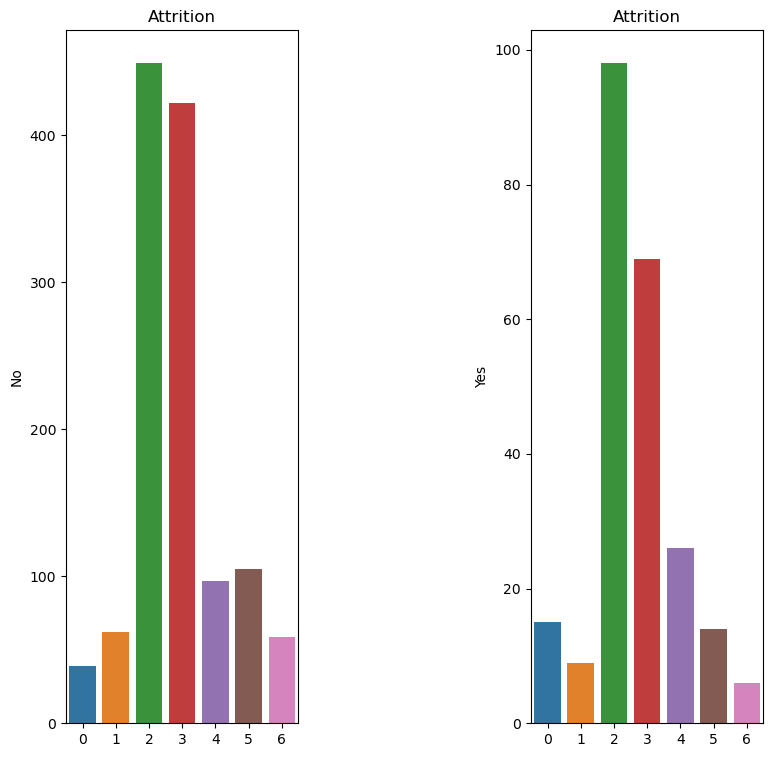

WorkLifeBalance & Attrition


WorkLifeBalance,1,2,3,4
Attrition,,,,
No,55,286,766,126
Yes,25,58,127,27


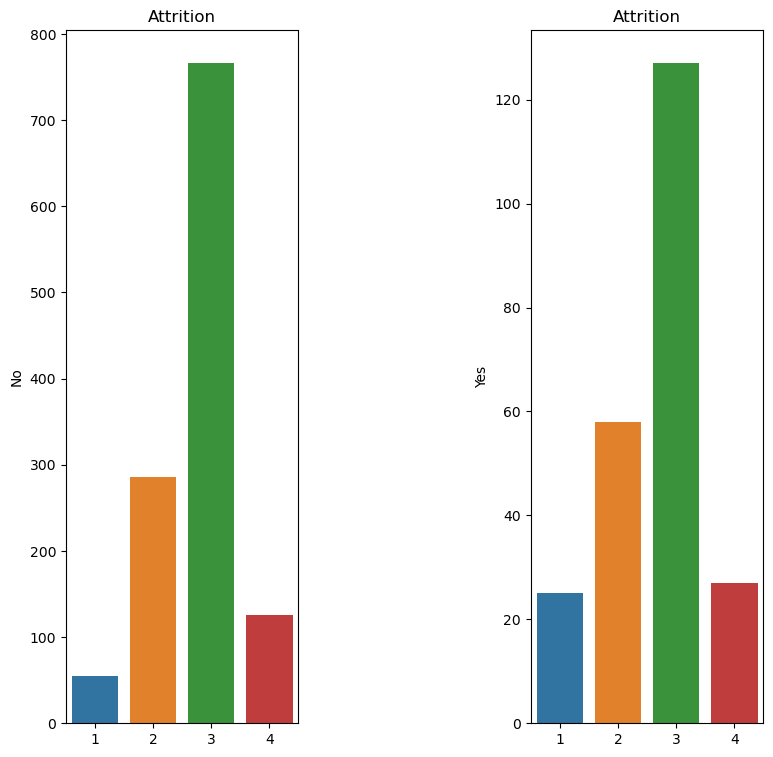

In [22]:
for col in categorical_df.columns[:-1]:
    print(f"{col} & Attrition")
    agg = df.pivot_table(index="Attrition", columns=col, values="Age", aggfunc=len)
   
    Attrition_yes = agg.iloc[0]
    Attrition_no = agg.iloc[1]
    categ = agg.columns.tolist()
    
    display(agg)
    plt.figure(figsize=(9, 9))
    
    plt.subplot(1, 2, 1)
    plt.title("Attrition")
    sns.barplot(x=categ, y=Attrition_yes)

    plt.subplot(1, 2, 2)
    plt.title("Attrition")
    sns.barplot(x=categ, y=Attrition_no)
    
    
    plt.subplots_adjust(hspace=1, wspace=1)
    plt.show()
    print("===============================")

## Split data

In [23]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1:]
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.30,random_state=19)

## Normalization

In [24]:
from sklearn.preprocessing import MinMaxScaler
numeric_cols=x_train.select_dtypes("number").columns
x_scaler=MinMaxScaler()

x_train[numeric_cols]=x_scaler.fit_transform(x_train[numeric_cols])

x_test[numeric_cols]=x_scaler.transform(x_test[numeric_cols])

## Encoding

In [25]:
# pd.DataFrame([categorical_df.nunique(),categorical_df.dtypes],index=["mm","dd"])

In [26]:
# one hot encoding
x_train=pd.get_dummies(x_train,columns=["BusinessTravel","Department","EducationField","Gender","JobRole","MaritalStatus","OverTime"])
x_test=pd.get_dummies(x_test,columns=["BusinessTravel","Department","EducationField","Gender","JobRole","MaritalStatus","OverTime"])
y_train=pd.get_dummies(y_train,columns=["Attrition"])
y_test=pd.get_dummies(y_test,columns=["Attrition"])

# ML using DT

In [27]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(x_train, y_train)

DecisionTreeClassifier(random_state=42)

In [28]:
from sklearn.metrics import accuracy_score

tr_pred = dt_model.predict(x_train)
ts_pred = dt_model.predict(x_test)

tr_acc = accuracy_score(y_train, tr_pred)
ts_acc = accuracy_score(y_test, ts_pred)

print(tr_acc)
print(ts_acc)

1.0
0.7777777777777778


In [29]:
max_depth=np.arange(2,15)
tr_errors = []
ts_errors = []
for md in max_depth:
    from sklearn.tree import DecisionTreeClassifier
    dt_model = DecisionTreeClassifier(max_depth=md,random_state=42)
    dt_model.fit(x_train, y_train)
    
    from sklearn.metrics import accuracy_score

    tr_pred = dt_model.predict(x_train)
    ts_pred = dt_model.predict(x_test)

    tr_acc = accuracy_score(y_train, tr_pred)
    ts_acc = accuracy_score(y_test, ts_pred)
    
    tr_errors.append(tr_acc)
    ts_errors.append(ts_acc)

print(tr_errors)
print(ts_errors)
    

[0.8522837706511176, 0.8639455782312925, 0.8756073858114675, 0.8746355685131195, 0.9076773566569485, 0.9212827988338192, 0.9475218658892128, 0.9659863945578231, 0.9873663751214772, 0.9912536443148688, 0.9970845481049563, 1.0, 1.0]
[0.8253968253968254, 0.8253968253968254, 0.81859410430839, 0.8163265306122449, 0.8095238095238095, 0.7868480725623582, 0.7913832199546486, 0.7732426303854876, 0.7687074829931972, 0.7709750566893424, 0.7709750566893424, 0.7777777777777778, 0.7777777777777778]
